In [1]:
import os
import matplotlib.pyplot as plt
import pims
# import pims.BioformatsReader
import sys
import numpy as np
sys.path.insert(0,'/home/jmamede/scripts')
# from support_pla import othercolor, cell_mask, multiply, rebin
from support_pla import cellpose_mask,cellpose_model
import pandas as pd
from nd2reader import ND2Reader
import glob
import csv
plot = True

import contextlib
import io
from cellpose import models
from cellpose import io as iocp
from cellpose import plot,utils
%matplotlib qt5

In [2]:
# ficheiro = "/run/media/jmamede/Joao/96wells/20201119_143803_601/WellA01_ChannelGFP,DAPI_Seq0000.nd2"
dirname = "/run/media/jmamede/Joao/Stephanie/20210405_131351_890/*nd2"

filelist = glob.glob(dirname)
filelist.sort()

# metadata = frames.metadata

In [3]:
ficheiro = filelist[13]
reader = pims.open(ficheiro)
# print(reader.sizes)

reader.bundle_axes = 'yx'
reader.iter_axes = 'c'
plt.imshow(reader[2],vmin=np.min(reader[2]),vmax=np.median(reader[2])*3)
ficheiro

/home/jmamede/anaconda3/lib/python3.7/site-packages/pims/base_frames.py:472: UserWarning: Please call FramesSequenceND.__init__() at the start of thethe reader initialization.
  warn("Please call FramesSequenceND.__init__() at the start of the"


'/run/media/jmamede/Joao/Stephanie/20210405_131351_890/WellB02_ChannelTRITC,FITC,DAPI_Seq0022.nd2'

In [4]:
# reader = ND2Reader(ficheiro)
# print(reader.sizes)

# metadata = reader.metadata
# reader.bundle_axes = 'cyx'
# reader.iter_axes = 'z'
# #there is a bug, it reads each visit point as a Z.
# reader.default_coords['v'] = 0
# #reader.sizes['z']

def plots(reader,cells_masks,nuclei_masks,base,clrs=[0,1]):
    from cellpose.utils import masks_to_outlines
    %matplotlib inline
    f, axarr = plt.subplots(2,2)
    print(axarr.shape)
    

    axarr[0,0].imshow(reader[clrs[0]],vmin=np.min(reader[0]),vmax=np.max(reader[0])
        ,cmap="gray"
                     )
    axarr[0,0].imshow(masks_to_outlines(cells_masks),alpha=0.4,cmap='jet')
    axarr[0,1].imshow(cells_masks
                      #,alpha=0.6
        )
#     axarr[0,2].imshow(reader[i][0],vmin=100,vmax=np.max(reader[5][0])/3
#         )
#     axarr[0,2].imshow(cells_masks,alpha=0.6
#         )
    axarr[1,0].imshow(reader[clrs[1]],vmin=np.min(reader[2]),vmax=np.median(reader[2]*3)
                      ,cmap="gray"
        )
    axarr[1,0].imshow(masks_to_outlines(nuclei_masks),alpha=0.4,cmap='jet')
    axarr[1,1].imshow(nuclei_masks
                      #,alpha=0.6
        )
#     axarr[1,2].imshow(reader[i][1],vmin=100,vmax=np.max(reader[5][0])/3
#         )
#     axarr[1,2].imshow(nuclei_masks
# #                 ,alpha=0.6
#         )
    plt.savefig(base+".png",dpi=600)
#     plt.show()
    return f,axarr

In [13]:
model = cellpose_model(GPU=True)
model_nuc = cellpose_model(model_type='nuclei')


** CUDA version installed and working. **
>>>> using GPU
cellpose_residual_on_style_on_concatenation_off
** CUDA version installed and working. **
>>>> using GPU
cellpose_residual_on_style_on_concatenation_off


In [5]:
base = os.path.splitext(ficheiro)[0]
    


In [72]:
cells_masks = cellpose_mask(reader[0],model
#                             ,size=2500
                            ,flow_threshold=1.4,size=0,diam=60,cell_prob=-4
                           )
nuclei_masks = cellpose_mask(reader[2],model_nuc
#                             ,size=2500
                            ,flow_threshold=1.8,size=0,diam=30,cell_prob=-2
                           )


processing 1 image(s)
time spent: running network 0.62s; flow+mask computation 0.10
estimated masks for 1 image(s) in 0.72 sec
>>>> TOTAL TIME 0.72 sec
processing 1 image(s)
time spent: running network 0.60s; flow+mask computation 0.40
estimated masks for 1 image(s) in 1.00 sec
>>>> TOTAL TIME 1.00 sec


In [73]:
%matplotlib qt5

(2, 2)


(<Figure size 432x288 with 4 Axes>,
 array([[<AxesSubplot:>, <AxesSubplot:>],
        [<AxesSubplot:>, <AxesSubplot:>]], dtype=object))

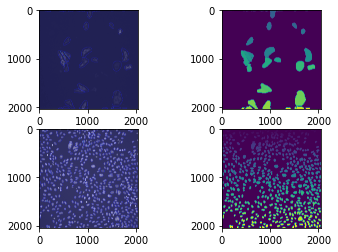

In [74]:
plots(reader,cells_masks,nuclei_masks,base,clrs=[0,2])

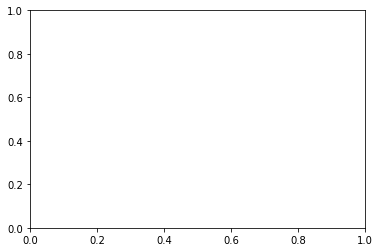

In [75]:

%matplotlib inline
plt.cla()

In [6]:
    
    
model = cellpose_model(GPU=True)
model_nuc = cellpose_model(GPU=True,model_type='nuclei')

** CUDA version installed and working. **
>>>> using GPU
cellpose_residual_on_style_on_concatenation_off
** CUDA version installed and working. **
>>>> using GPU
cellpose_residual_on_style_on_concatenation_off


In [7]:
base = os.path.splitext(ficheiro)[0]

f = open(base+"csv", 'wt')
output = csv.writer(f
#                     , delimiter=',',
#                             quotechar='"', quoting=csv.QUOTE_MINIMAL
                   )
output.writerow(["FileName","num_cells","infected_cells0","infected_cells1","percentage0","percentage1"])

76

In [ ]:
for ficheiro in filelist:
    reader = pims.open(ficheiro)
    base = os.path.splitext(ficheiro)[0]
    reader.bundle_axes = 'yx'
    reader.iter_axes = 'c'
    with contextlib.redirect_stdout(io.StringIO()):

        cells_masks = cellpose_mask(reader[0],model
        #                             ,size=2500
                                    ,flow_threshold=1.4,size=0,diam=60,cell_prob=-4
                                   )
        cells_masks2 = cellpose_mask(reader[1],model
#                             ,size=2500
                            ,flow_threshold=1.4,size=0,diam=60,cell_prob=-4
                           )
        nuclei_masks = cellpose_mask(reader[2],model_nuc
        #                             ,size=2500
                                    ,flow_threshold=1.8,size=0,diam=30,cell_prob=-2
                                   )

        outlines = utils.outlines_list(cells_masks)
        iocp.outlines_to_text(base, outlines)

        fig,axarr =  plots(reader,cells_masks2,nuclei_masks,base,clrs=[1,2])

    text = "Image#: {0} Number of Nuclei: {1} Number of positive cells: {2} Percentage: {3}".format(base,nuclei_masks.max(),cells_masks.max(),cells_masks.max()/nuclei_masks.max()*100)
    print(ficheiro,text)
    output.writerow([ficheiro,nuclei_masks.max(),cells_masks.max(),cells_masks2.max(),cells_masks.max()/nuclei_masks.max()*100,cells_masks2.max()/nuclei_masks.max()*100],)
f.close()

/run/media/jmamede/Joao/Stephanie/20210405_131351_890/WellA01_ChannelTRITC,FITC,DAPI_Seq0000.nd2 Image#: /run/media/jmamede/Joao/Stephanie/20210405_131351_890/WellA01_ChannelTRITC,FITC,DAPI_Seq0000 Number of Nuclei: 322 Number of positive cells: 79 Percentage: 24.53416149068323
/run/media/jmamede/Joao/Stephanie/20210405_131351_890/WellA02_ChannelTRITC,FITC,DAPI_Seq0001.nd2 Image#: /run/media/jmamede/Joao/Stephanie/20210405_131351_890/WellA02_ChannelTRITC,FITC,DAPI_Seq0001 Number of Nuclei: 411 Number of positive cells: 106 Percentage: 25.790754257907544
/run/media/jmamede/Joao/Stephanie/20210405_131351_890/WellA03_ChannelTRITC,FITC,DAPI_Seq0002.nd2 Image#: /run/media/jmamede/Joao/Stephanie/20210405_131351_890/WellA03_ChannelTRITC,FITC,DAPI_Seq0002 Number of Nuclei: 390 Number of positive cells: 102 Percentage: 26.153846153846157
/run/media/jmamede/Joao/Stephanie/20210405_131351_890/WellA04_ChannelTRITC,FITC,DAPI_Seq0003.nd2 Image#: /run/media/jmamede/Joao/Stephanie/20210405_131351_890/

In [ ]:
from numba import cuda
cuda.select_device(0)
cuda.close()
cuda.select_device(0)